<a href="https://colab.research.google.com/github/easyforitall/Median-Income-Predictions-using-ML/blob/main/Median_income_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("C://Users//43720//Downloads//housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#Data -> clean(outliers, nullvalues,missingvallues etc,,
      -> encode
      -> split
      -> scale

In [ ]:
df.shape

(20640, 10)

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [ ]:
df["total_bedrooms"].value_counts()

280.0     55
331.0     51
345.0     50
393.0     49
343.0     49
          ..
2205.0     1
1448.0     1
1691.0     1
2537.0     1
2546.0     1
Name: total_bedrooms, Length: 1923, dtype: int64

In [ ]:
df[df["total_bedrooms"].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


<AxesSubplot:ylabel='Frequency'>

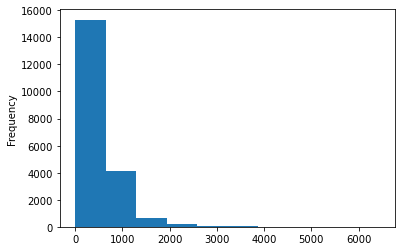

In [ ]:
df["total_bedrooms"].plot(kind='hist')

<AxesSubplot:xlabel='total_bedrooms'>

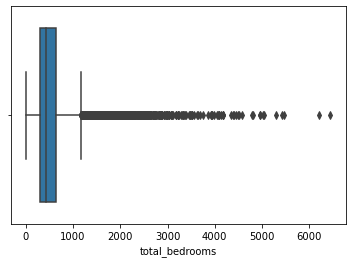

In [ ]:
sns.boxplot(x="total_bedrooms",data=df)

In [ ]:
df["total_bedrooms"].unique()

array([ 129., 1106.,  190., ..., 3008., 1857., 1052.])

In [ ]:
df["total_bedrooms"].sort_values().median()

435.0

In [ ]:
df["total_bedrooms"].dropna().mean()

537.8705525375618

In [ ]:
df["total_bedrooms"].fillna(df["total_bedrooms"].median(),inplace=True)

<AxesSubplot:xlabel='total_bedrooms'>

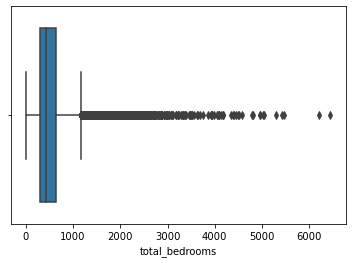

In [ ]:
sns.boxplot(x="total_bedrooms",data=df)

In [ ]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    higher_range = Q3+(1.5*IQR)
    return lower_range,higher_range

In [ ]:
df[df["total_bedrooms"].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [ ]:
df.loc[290]

longitude              -122.16
latitude                 37.77
housing_median_age          47
total_rooms               1256
total_bedrooms             435
population                 570
households                 218
median_income            4.375
median_house_value      161900
ocean_proximity       NEAR BAY
Name: 290, dtype: object

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='longitude'>

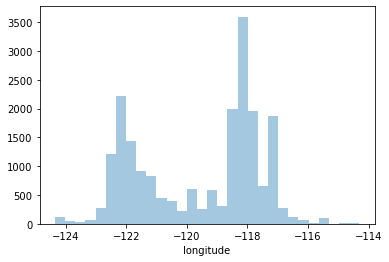

In [ ]:
sns.distplot(df["longitude"],kde=False,bins=30)

In [ ]:
df[["longitude","median_income"]].corr()

,longitude,median_income
longitude,1.000000,-0.015176
median_income,-0.015176,1.000000


,transform,median_income
transform,1.000000,-0.062205
median_income,-0.062205,1.000000


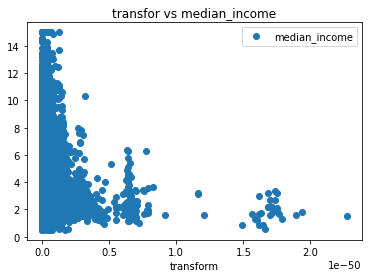

In [ ]:
df['transform'] = np.exp(df["longitude"])
df.plot(x='transform',y= 'median_income',style='o')
plt.title("transfor vs median_income")
df[['transform','median_income']].corr()


C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='latitude'>

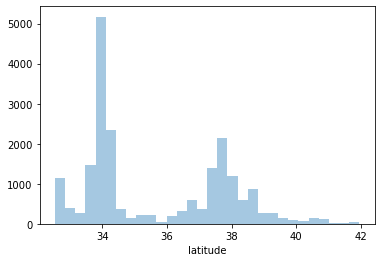

In [ ]:
sns.distplot(df["latitude"],kde=False,bins=30)

In [ ]:
df[["latitude","median_income"]].corr()

,latitude,median_income
latitude,1.000000,-0.079809
median_income,-0.079809,1.000000


,transform,median_income
transform,1.000000,-0.079809
median_income,-0.079809,1.000000


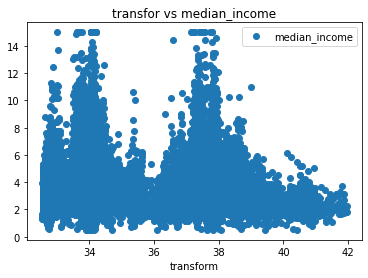

In [ ]:
df['transform'] = df["latitude"]
df.plot(x='transform',y= 'median_income',style='o')
plt.title("transfor vs median_income")
df[['transform','median_income']].corr()

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='housing_median_age'>

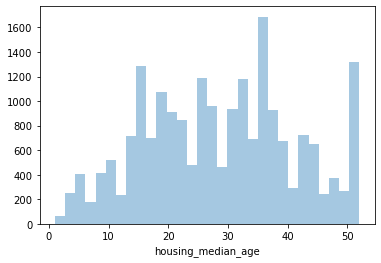

In [ ]:
sns.distplot(df["housing_median_age"],kde=False,bins=30)

In [ ]:
df[["housing_median_age","median_income"]].corr()

,housing_median_age,median_income
housing_median_age,1.000000,-0.119034
median_income,-0.119034,1.000000


,transform,median_income
transform,1.000000,-0.135155
median_income,-0.135155,1.000000


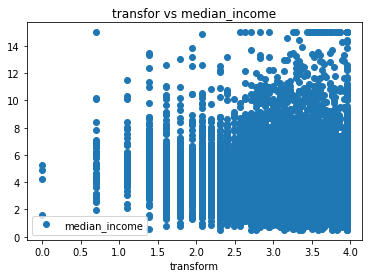

In [ ]:
df['transform'] = np.log(df["housing_median_age"])
df.plot(x='transform',y= 'median_income',style='o')
plt.title("transfor vs median_income")
df[['transform','median_income']].corr()

In [ ]:
df['housing_median_age'] = np.log(df["housing_median_age"])

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_rooms'>

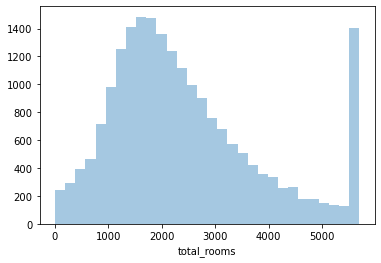

In [ ]:
sns.distplot(df["total_rooms"],kde=False,bins=30)

In [ ]:
lowincome,highincome = remove_outliers(df['total_rooms'])
df["total_rooms"] = np.where(df["total_rooms"]>highincome,highincome,df["total_rooms"])
df["total_rooms"] = np.where(df["total_rooms"]<lowincome,lowincome,df["total_rooms"])

,transform,median_income
transform,1.000000,0.226591
median_income,0.226591,1.000000


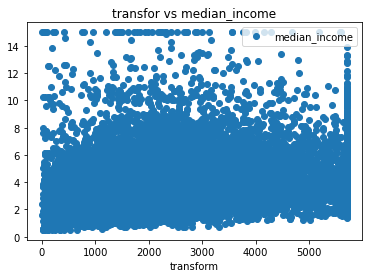

In [ ]:
df['transform'] = df["total_rooms"]
df.plot(x='transform',y= 'median_income',style='o')
plt.title("transfor vs median_income")
df[['transform','median_income']].corr()

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bedrooms'>

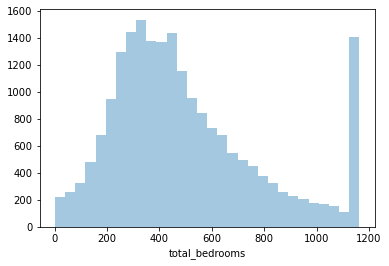

In [ ]:
sns.distplot(df["total_bedrooms"],kde=False,bins=30)

In [ ]:
lowincome,highincome = remove_outliers(df['total_bedrooms'])
df["total_bedrooms"] = np.where(df["total_bedrooms"]>highincome,highincome,df["total_bedrooms"])
df["total_bedrooms"] = np.where(df["total_bedrooms"]<lowincome,lowincome,df["total_bedrooms"])

,transform,median_income
transform,1.000000,-0.027616
median_income,-0.027616,1.000000


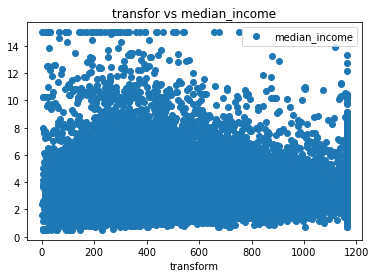

In [ ]:
df['transform'] = df["total_bedrooms"]
df.plot(x='transform',y= 'median_income',style='o')
plt.title("transfor vs median_income")
df[['transform','median_income']].corr()

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='population'>

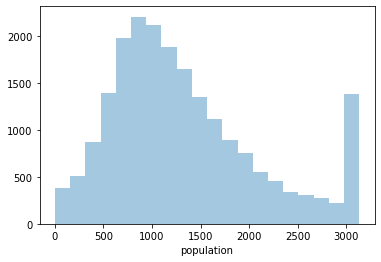

In [ ]:
sns.distplot(df["population"],kde=False,bins=20)

,transform,median_income
transform,1.000000,-0.014028
median_income,-0.014028,1.000000


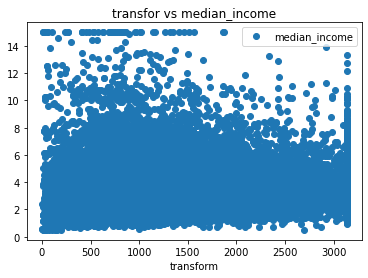

In [ ]:
df['transform'] = (df["population"])
df.plot(x='transform',y= 'median_income',style='o')
plt.title("transfor vs median_income")
df[['transform','median_income']].corr()

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='households'>

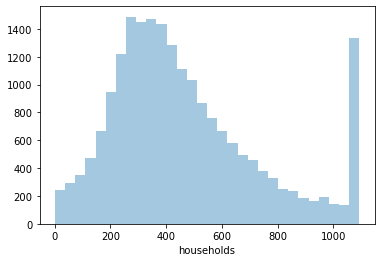

In [ ]:
sns.distplot(df["households"],kde=False,bins=30)

,transform,median_income
transform,1.000000,-0.000197
median_income,-0.000197,1.000000


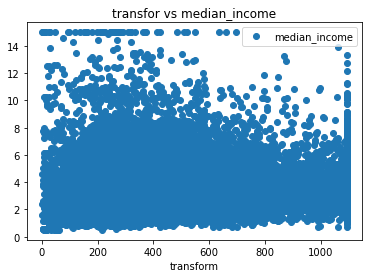

In [ ]:
df['transform'] = df["households"]
df.plot(x='transform',y= 'median_income',style='o')
plt.title("transfor vs median_income")
df[['transform','median_income']].corr()

C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value'>

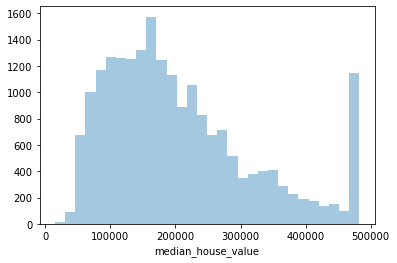

In [ ]:
sns.distplot(df["median_house_value"],kde=False,bins=30)

C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='median_house_value'>

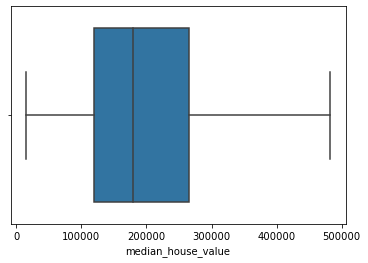

In [ ]:
sns.boxplot(df["median_house_value"])

In [ ]:
lowincome,highincome = remove_outliers(df['median_house_value'])
df["median_house_value"] = np.where(df["median_house_value"]>highincome,highincome,df["median_house_value"])
df["median_house_value"] = np.where(df["median_house_value"]<lowincome,lowincome,df["median_house_value"])

,transform,median_income
transform,1.000000,0.685855
median_income,0.685855,1.000000


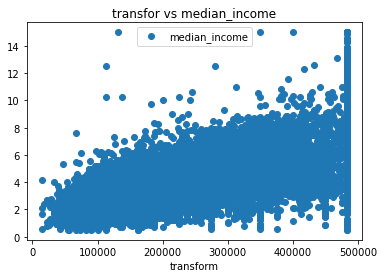

In [ ]:
df['transform'] = df["median_house_value"]
df.plot(x='transform',y= 'median_income',style='o')
plt.title("transfor vs median_income")
df[['transform','median_income']].corr()

In [ ]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
df1 = pd.get_dummies(df["ocean_proximity"],drop_first=True)
df1

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
20635,1,0,0,0
20636,1,0,0,0
20637,1,0,0,0
20638,1,0,0,0


In [ ]:
df = pd.concat([df,df1],axis=1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,transormed,transorm,transform,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,3.713572,880.000,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,14940.1729,14940.1729,452600.0,0,0,1,0
1,-122.22,37.86,3.044522,5698.375,1106.0,2401.0,1092.5,8.3014,358500.0,NEAR BAY,14937.7284,14937.7284,358500.0,0,0,1,0
2,-122.24,37.85,3.951244,1467.000,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,14942.6176,14942.6176,352100.0,0,0,1,0
3,-122.25,37.85,3.951244,1274.000,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,14945.0625,14945.0625,341300.0,0,0,1,0
4,-122.25,37.85,3.951244,1627.000,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,14945.0625,14945.0625,342200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,3.218876,1665.000,374.0,845.0,330.0,1.5603,78100.0,INLAND,14662.7881,14662.7881,78100.0,1,0,0,0
20636,-121.21,39.49,2.890372,697.000,150.0,356.0,114.0,2.5568,77100.0,INLAND,14691.8641,14691.8641,77100.0,1,0,0,0
20637,-121.22,39.43,2.833213,2254.000,485.0,1007.0,433.0,1.7000,92300.0,INLAND,14694.2884,14694.2884,92300.0,1,0,0,0
20638,-121.32,39.43,2.890372,1860.000,409.0,741.0,349.0,1.8672,84700.0,INLAND,14718.5424,14718.5424,84700.0,1,0,0,0


In [ ]:
df.drop("ocean_proximity",axis=1,inplace=True)

In [ ]:
df.drop(["transorm"],axis=1,inplace=True)

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,3.713572,880.000,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,3.044522,5698.375,1106.0,2401.0,1092.5,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,3.951244,1467.000,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,3.951244,1274.000,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,3.951244,1627.000,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [ ]:
X = df.drop("median_income",axis=1)

In [ ]:
y = df["median_income"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=["Coefficient"])
coeff_df

,Coefficient
longitude,0.098975
latitude,0.039487
housing_median_age,-0.249834
total_rooms,2.071479
total_bedrooms,-2.257416
population,0.227159
households,-0.055029
median_house_value,1.111824
INLAND,-0.057320
ISLAND,-0.028065


In [ ]:
y_pred = regressor.predict(X_test_scaled)
y_pred

array([1.48125313, 3.47363108, 8.72982899, ..., 4.31380184, 3.33761376,
       3.58013463])

In [ ]:
regressor.intercept_ #c

3.876891549003322

In [ ]:
df2 = pd.DataFrame({"Actual":y_test,"predicted":y_pred})
df2

,Actual,predicted
20046,1.6812,1.481253
3024,2.5313,3.473631
15663,3.4801,8.729829
20484,5.7376,5.778575
9814,3.7250,4.545478
...,...,...
17505,2.9545,3.611611
13512,1.4891,2.043472
10842,3.5120,4.313802
16559,3.6500,3.337614


C:\Program Files\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_income', ylabel='Density'>

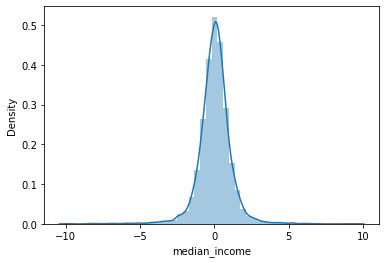

In [ ]:
sns.distplot(y_pred-y_test)

In [ ]:
from sklearn import metrics
print("R2-score:",metrics.r2_score(y_test,y_pred))
# R-value is between 1 and 0 and near to 0 this is the best model

R2-score: 0.6442074856343627


In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.7500672518325137

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

1.2679970755471794

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.1260537622809932

In [ ]:
regressor.predict([-122.23,37,88,3.713572,880.000,129.0,322.0,126.0,452600.0,0,0,1,0])

NameError: name 'regressor' is not defined